In [1]:
import sys
sys.path.insert(0, "../../../")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline

from timeit import default_timer as timer
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

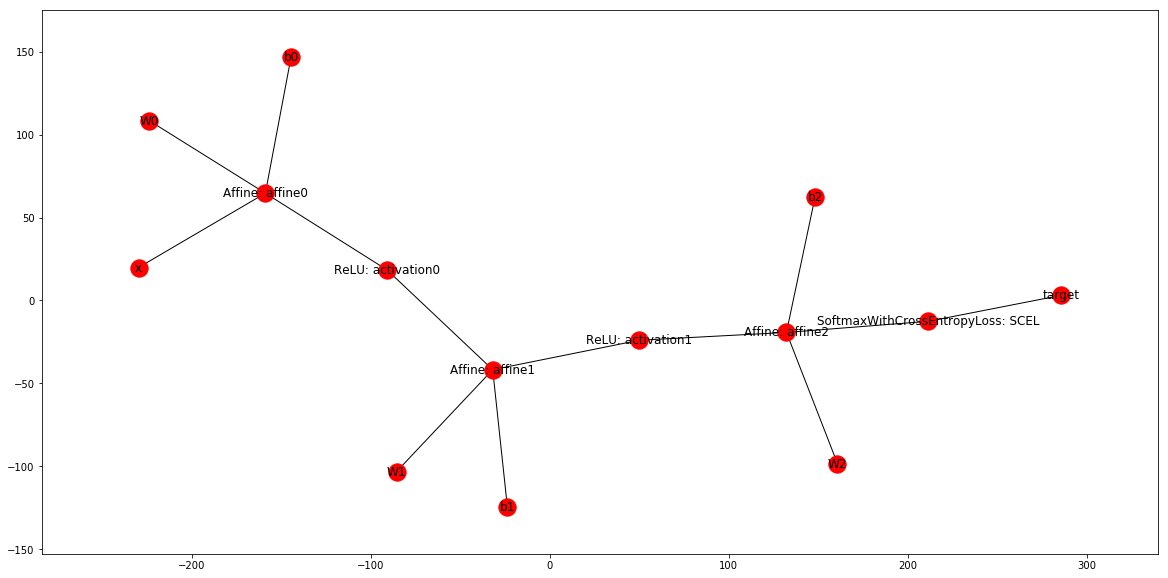

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000

s = timer();
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)
e = timer();

print("learning time : ", e-s);

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0388
Epoch   0 Completed - Train Error: 2.315467 - Validation Error: 2.312496 - Test Accuracy: 0.038800
Epoch   1 Completed - Train Error: 0.704959 - Validation Error: 0.677025 - Test Accuracy: 0.724000
Epoch   2 Completed - Train Error: 0.675158 - Validation Error: 0.659273 - Test Accuracy: 0.744700
Epoch   3 Completed - Train Error: 0.485294 - Validation Error: 0.486357 - Test Accuracy: 0.810300
Epoch   4 Completed - Train Error: 0.496698 - Validation Error: 0.480498 - Test Accuracy: 0.822300
Epoch   5 Completed - Train Error: 0.509981 - Validation Error: 0.503388 - Test Accuracy: 0.809100
Epoch   6 Completed - Train Error: 0.410844 - Validation Error: 0.433118 - Test Accuracy: 0.834600
Epoch   7 Completed - Train Error: 0.396758 - Validation Error: 0.408630 - Test Accuracy: 0.839500
Epoch   8 Completed - Train Error: 0.369666 - Validation Error: 0.400549 - Test Accuracy: 0.844100
Epoch   9 Completed - Train Error: 0.422029 - Validation Error: 0.403041 - Test Accur

Epoch  83 Completed - Train Error: 0.375749 - Validation Error: 0.380657 - Test Accuracy: 0.848500
Epoch  84 Completed - Train Error: 0.360255 - Validation Error: 0.379399 - Test Accuracy: 0.848600
Epoch  85 Completed - Train Error: 0.375038 - Validation Error: 0.388751 - Test Accuracy: 0.843000
Epoch  86 Completed - Train Error: 0.382511 - Validation Error: 0.375579 - Test Accuracy: 0.851200
Epoch  87 Completed - Train Error: 0.358113 - Validation Error: 0.375116 - Test Accuracy: 0.850800
Epoch  88 Completed - Train Error: 0.396976 - Validation Error: 0.377212 - Test Accuracy: 0.850200
Epoch  89 Completed - Train Error: 0.330599 - Validation Error: 0.370890 - Test Accuracy: 0.853700
Epoch  90 Completed - Train Error: 0.348056 - Validation Error: 0.382198 - Test Accuracy: 0.852100
Epoch  91 Completed - Train Error: 0.334320 - Validation Error: 0.372056 - Test Accuracy: 0.854100
Epoch  92 Completed - Train Error: 0.350434 - Validation Error: 0.377511 - Test Accuracy: 0.849400
Epoch  93 

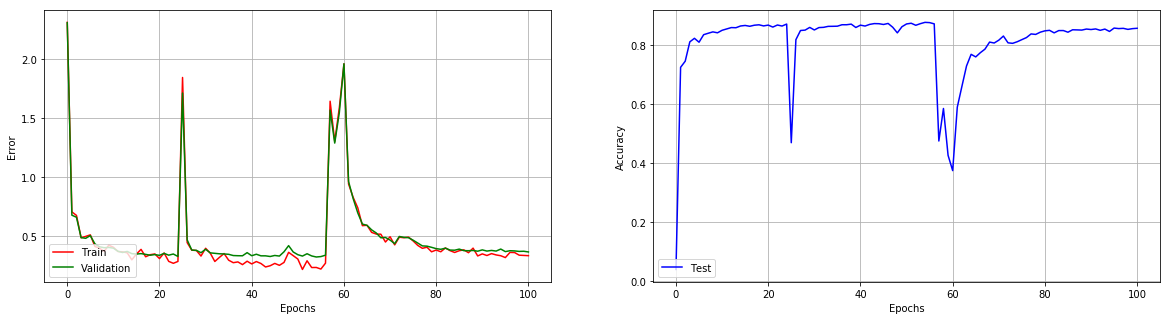

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: shirt, Ground Truth: coat
False Prediction Index: 23, Prediction: sandal, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat
False Prediction Index: 29, Prediction: coat, Ground Truth: dress


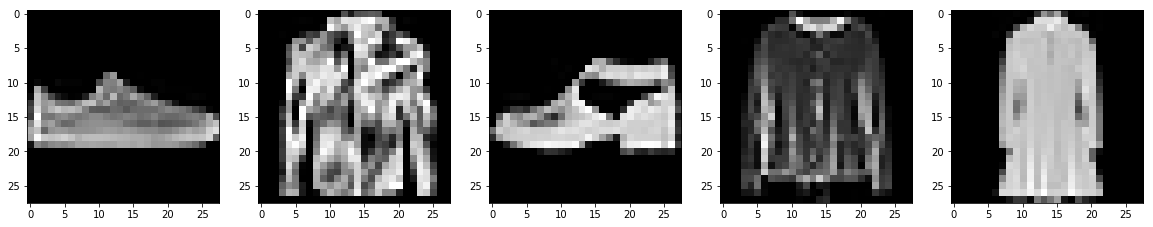

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

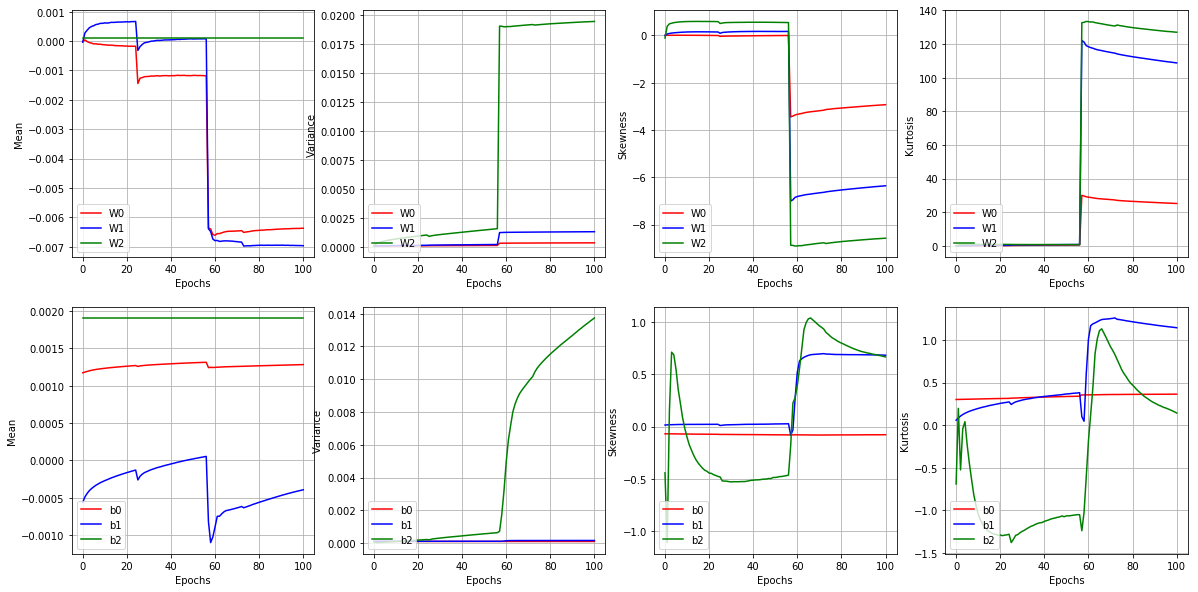

In [8]:
n.draw_param_description(figsize=(20, 10))

In [9]:
import numpy
numpy.version.version

'1.12.1'